This follows the code description in "gi_documentation.pdf".
See that documentation for additional descriptions, options, etc.

In [ ]:
# Python 3.7

# Assumes we're running in a directory like ~/Dropbox/...../GI_code/Array_name/
# The source files are in ~/Dropbox/...../GI_code/GI/

import sys
sys.path.append('../GI1_v2/')
sys.path.append('../GI1_v2/PLOT/')

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob



import numpy as np
import green as g
import source as s
import processing as proc
import parameters
import time
from correlation_random import *
from correlation_function import *
from correlation_field import *
from correction_factors import *
from correlation_effective import *
from correctors import *
from correlations import *
from kernels import *
from adsrc import *
from earthquakes import *


%matplotlib inline
mpl.rcParams['figure.figsize'] = [20, 5]


In [2]:
# Set up output folder
# Clear contents of previous run
for d in ['correctors','correlations','correlations_individual']:
    this_dir='OUTPUT/'+d
    if not os.path.exists(this_dir):
        # Make the directory
        os.makedirs(this_dir)
    else:
        # Clear the directory
        files=glob.glob(this_dir+'/*')
        for f in files:
            os.remove(f)

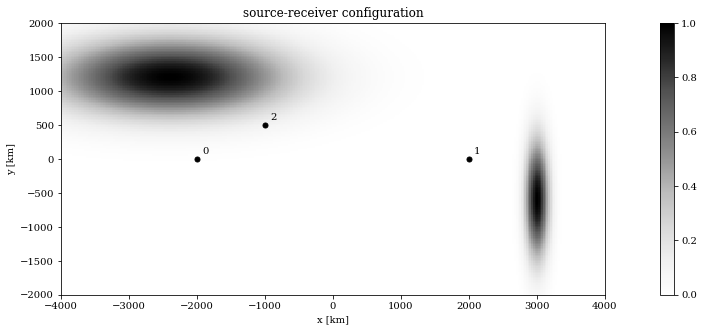

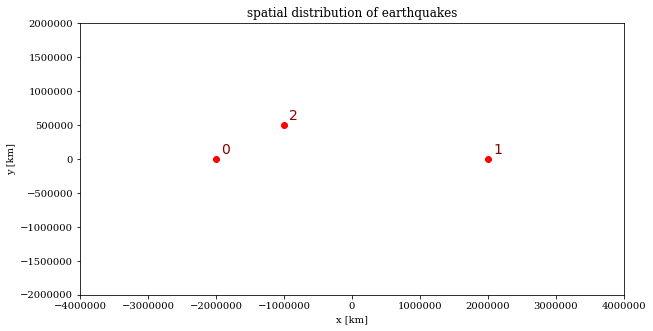

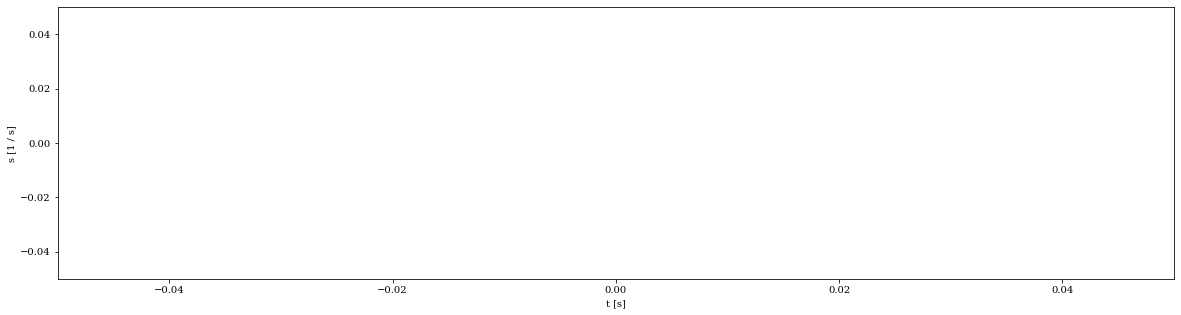

In [5]:
# First, let's look at the station geometry and noise sources
#
# Stations are defined in "INPUT/receivers.txt"
# Noise sources are defined in "INPUT/setup.txt"
#  These are set by a flag (e.g., type=gauss3_sparse), 
#  referring to situations hard-coded in source.py

S,indeces=s.space_distribution(plot=1)

# We can also see earthquakes defined in "INPUT/earthquake_catalogue.txt"
earthquakes()

/Users/danielbowden/Desktop/GI_tmp2/GI1_v2/source.py:406: RuntimeWarning: divide by zero encountered in true_divide
  T=1.0/f


number of samples: 1024
maximum time: 1990.0 s
maximum frequency: 0.09990234375000001 Hz
one-bit normalisation


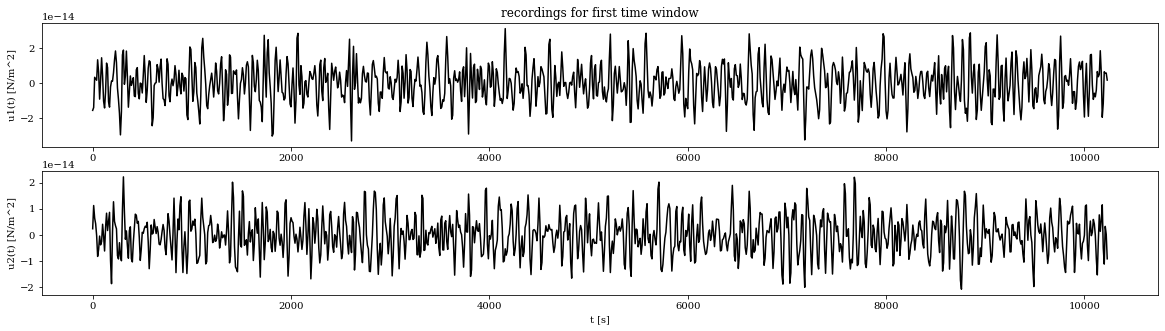

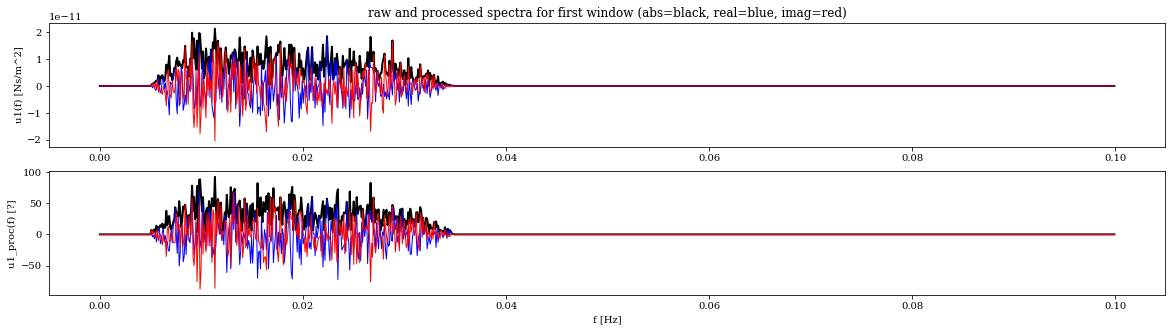

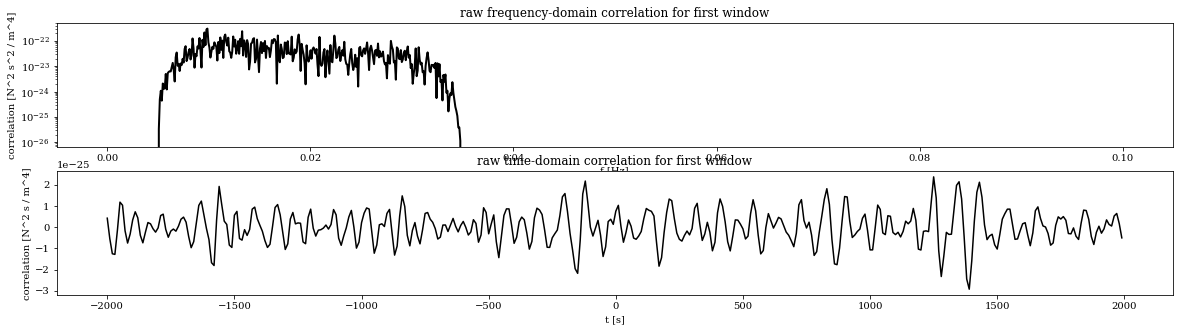

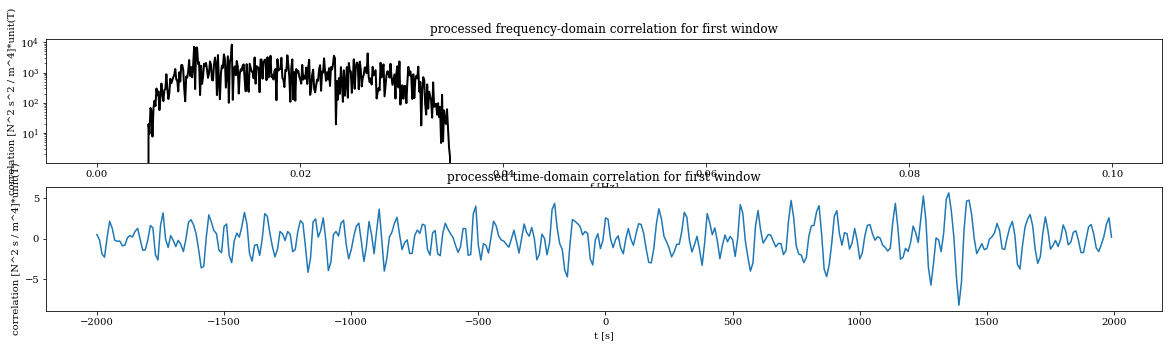

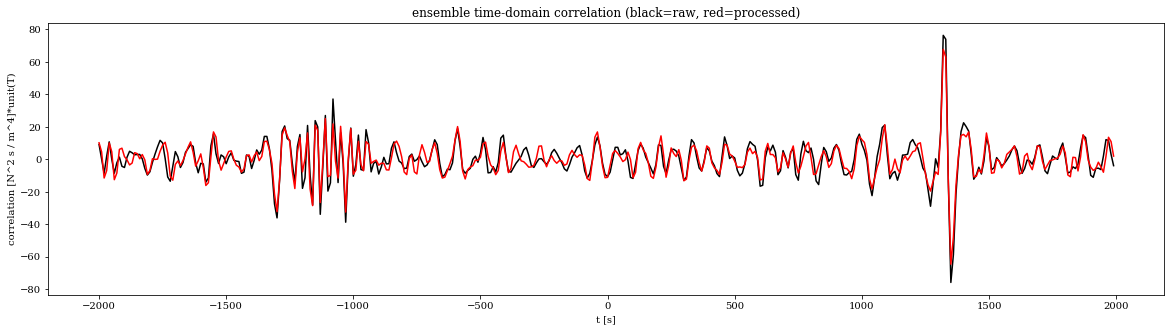

elapsed time: 20.525234937667847 s


In [6]:
# 3.1.1 Computing inter-station correlations from random wavefields
#
# Here we ask for the cross-correlation between two receivers
#
# This could take a to run, since we're creating hundreds or thousands of realisations of the wavefield,
#  as specified in "INPUT/ensemble_correlation.txt"

cct,cct_proc,t,ccf,ccf_proc,f=correlation_random(rec0=0,rec1=1,verbose=1,plot=1,save=0)

compute propagation and source correction factors -------------
receiver pair: 0 0
time: 19.90288209915161 s
receiver pair: 0 1
time: 39.64023804664612 s
receiver pair: 0 2
time: 60.56925415992737 s
receiver pair: 1 1
time: 81.23775005340576 s
receiver pair: 1 2
time: 101.45672011375427 s
receiver pair: 2 2
time: 122.25971817970276 s


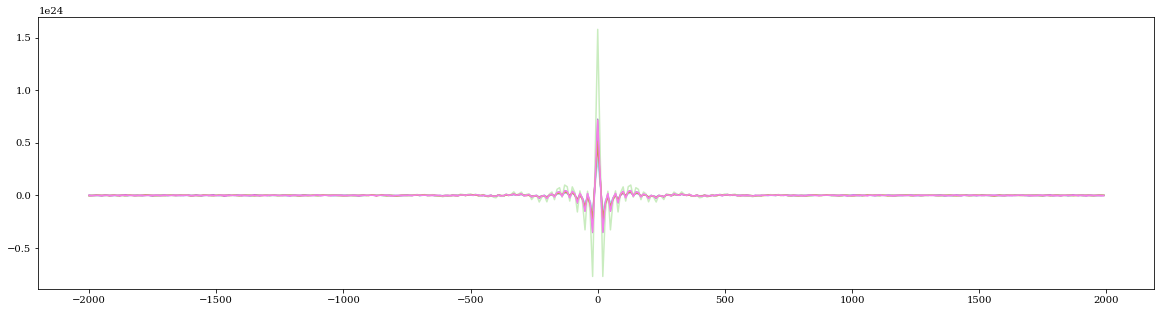

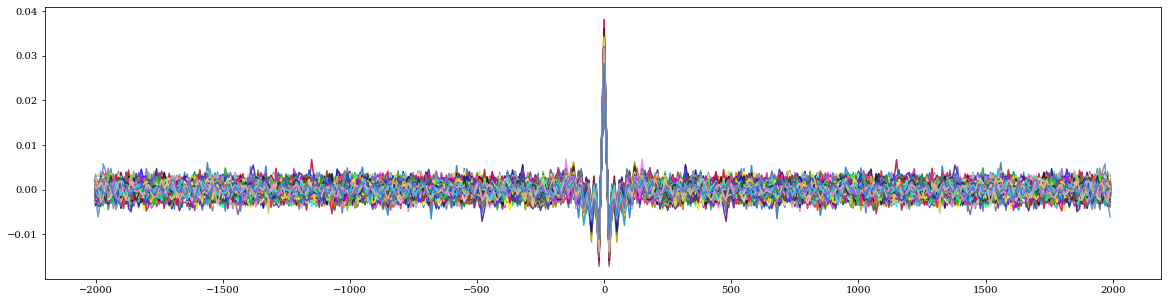

elapsed time: 125.82782793045044 s


In [7]:
# 3.1.2 Computing source and propagation correctors

f,gf_ik,n_ff,t,gt_ik,n_ft = correction_factors(reg_level=100000.0,save=True,verbose=True,plot=True)

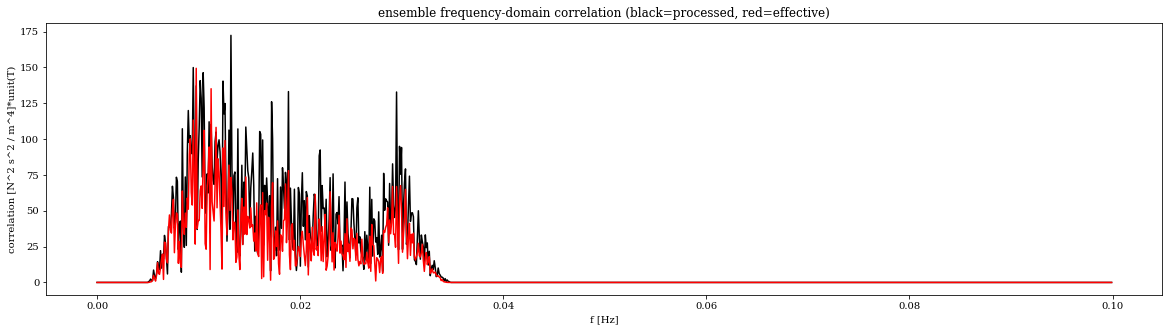

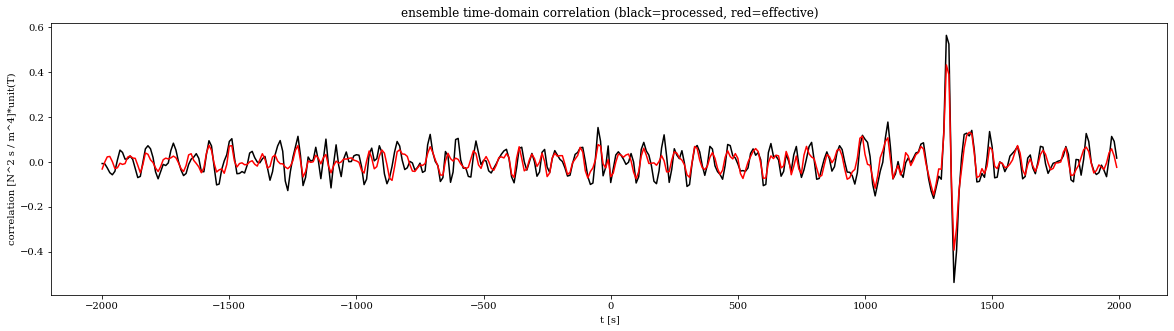

In [8]:
# 3.1.3 Computing effective correlations

cct_eff,t,ccf_eff,f = correlation_effective(rec0=0,rec1=1,verbose=True,plot=True,save=True)


/anaconda3/envs/obspy2/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


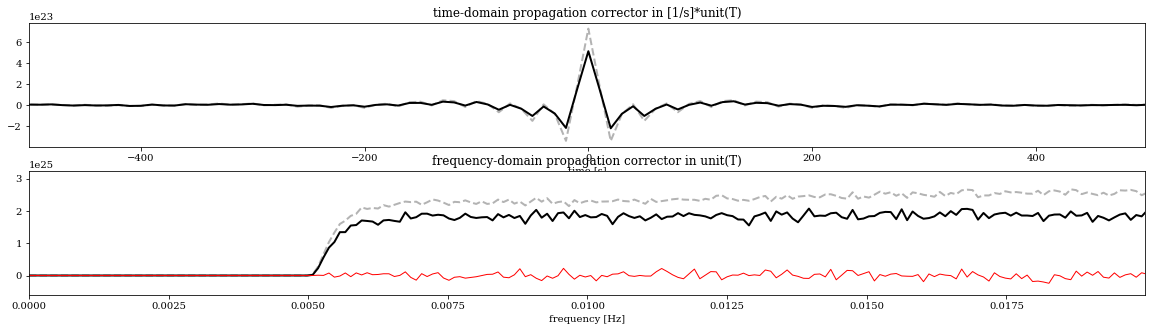

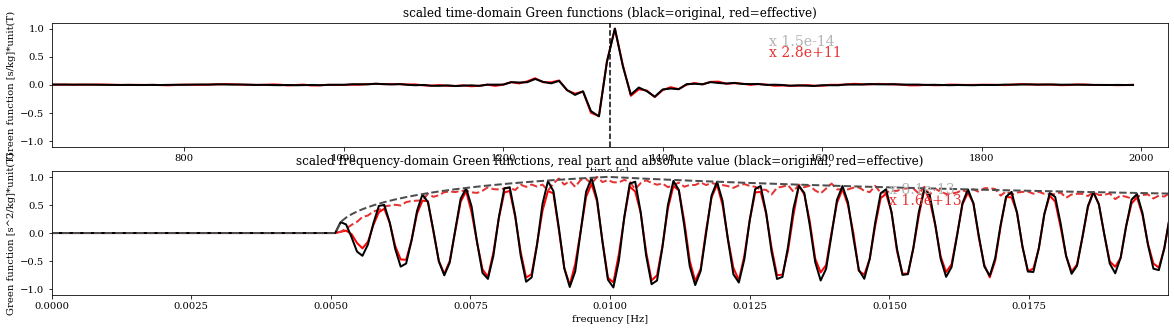

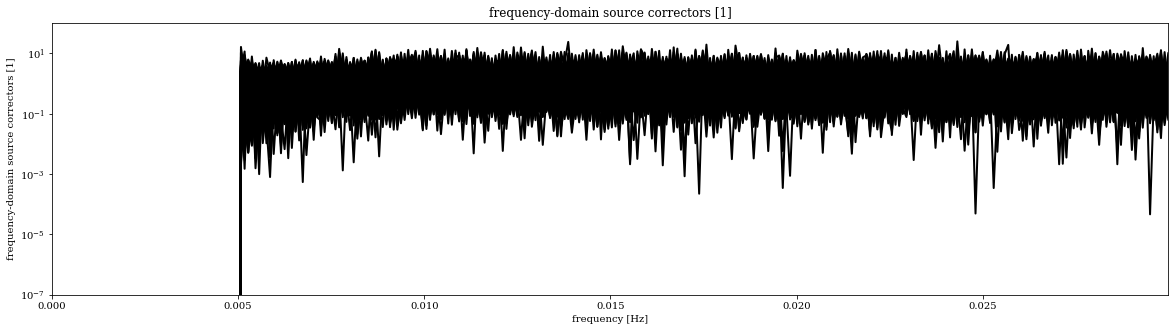

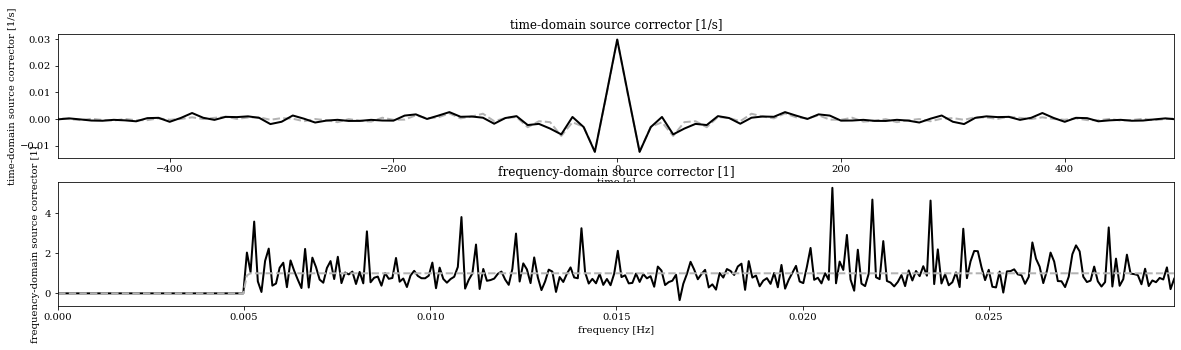

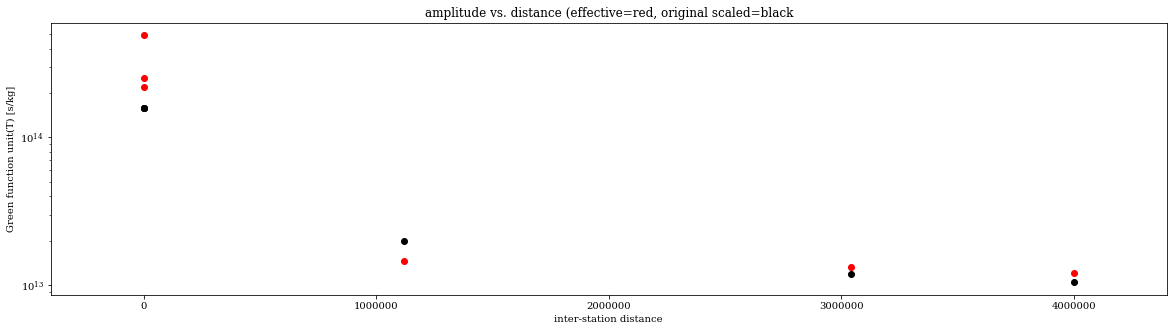

In [9]:
# 3.1.4 Plotting source and propagation correctors


propagation(rec0=0,rec1=1)
source(n_win=0)
geometric_spreading(freq=0.015)

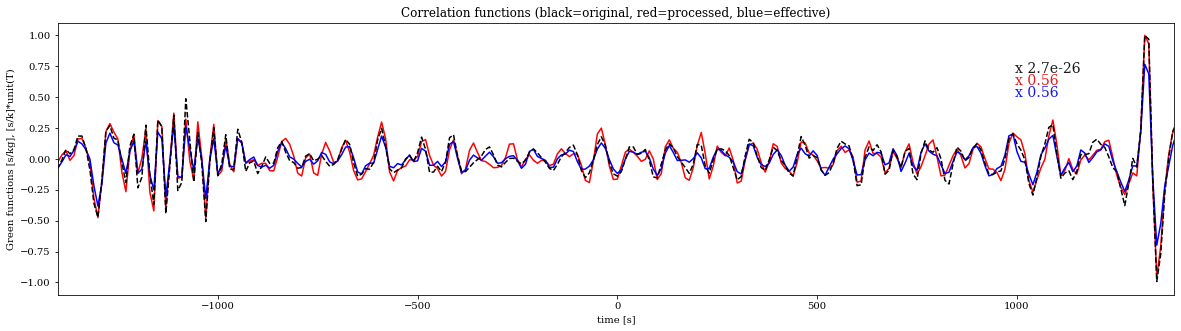

In [10]:
# 3.1.5 Plotting raw, processed and effective correlations

correlations(rec0=0,rec1=1,effective=True)

In [ ]:
# 3.1.6 Plotting the spatial and temporal distribution of earthquakes

# See earlier cell

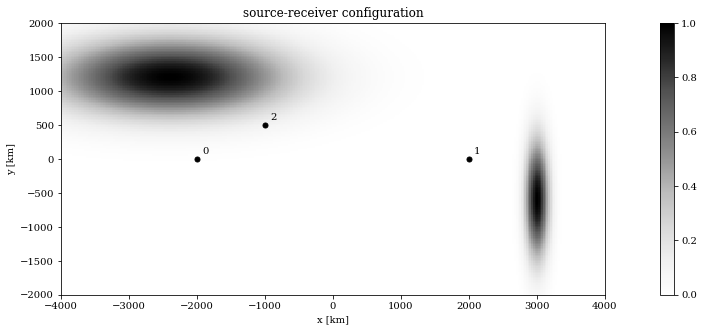

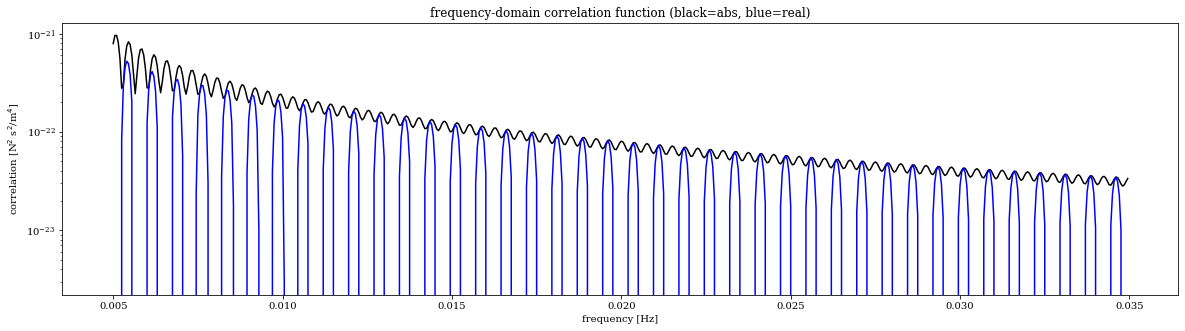

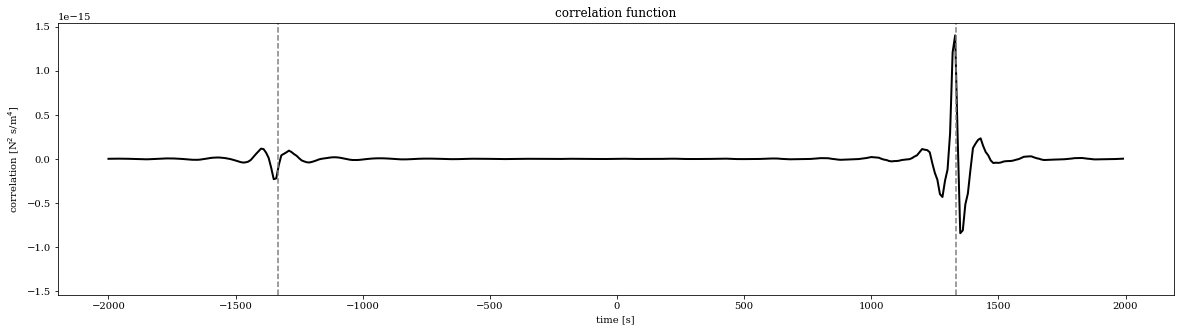

FileNotFoundError: [Errno 2] No such file or directory: 'OUTPUT/cf_0.npy'

In [11]:
# 3.2.1 Computing inter-station correlation functions for a given power-spectral density distribution

cct,t,ccf,f = correlation_function(rec0=0,rec1=1,effective=False,plot=True)

# This will take a couple minutes
#precompute(rec=0,verbose=True,mode='individual')
snapshot(rec=0,t=500.0, minvalplot=0.0, maxvalplot=0.0, plot=True, save=False, verbose=False, dir_precomputed='OUTPUT/');

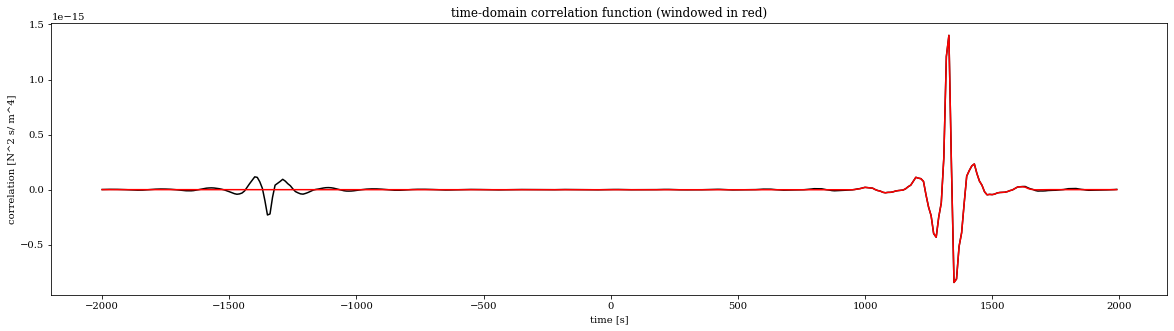

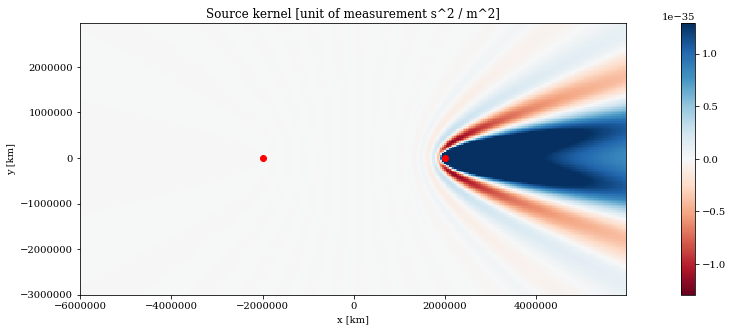

In [12]:
# 3.2.3 Computing source kernels

cct,t,ccf,f = correlation_function(rec0=0,rec1=1,effective=False,plot=False)
x,y,K_kappa = source_kernel(cct, t, rec0=0, rec1=1, measurement='amp', effective=0, plot=1)


In [ ]:
# To make a full movie:
time_axis = np.arange(100.0, 1500.0, 100)
movie(time_axis, minvalplot=0.0, maxvalplot=0.0, verbose=0)